# Packages Import

In [1]:
import arabic_reshaper
import matplotlib.pyplot as plt
import nltk
import os
import pandas as pd
import pickle
import re
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from stop_words import get_stop_words
from wordcloud import WordCloud
from hunspell import Hunspell

# 1 - Business & data Understanding

In [2]:
data = pd.read_excel("new_data1.xlsx")
data.head()

,id,title,category_name
0,vFb-NHhy27o,Fornite or Call duty 🤔🤔🤔🤔,ألعاب
1,Svm9yokQoJs,كولف ديوتي 🤫,ألعاب
2,MFFDr8MFHuo,دين الاسلام دين الوسط كيف وسط بين ماذا وماذا ...,الدين
3,nR3sHfDGhwU,لعبة ثلاجة وفريزر - العاب اطفال تعليمية,ألعاب
4,2Y9QLffnl6g,Have you ever seen this animal up close? This ...,وثائقي


In [3]:
category_counts = data.category_name.value_counts()
category_names = category_counts.index.tolist()
category_values = category_counts.values.tolist()
category_counts

category_name
الدين     3438
ألعاب     2923
وثائقي    2725
Name: count, dtype: int64

This dataset includes : 
   <br> &emsp; * 9086 samples ; 
   <br> &emsp; * 3 classes which are وثائقي , ألعاب and الدين
   <br> &emsp; * Text located at the column with index of 2

## 1.1-Category Split Visualisation

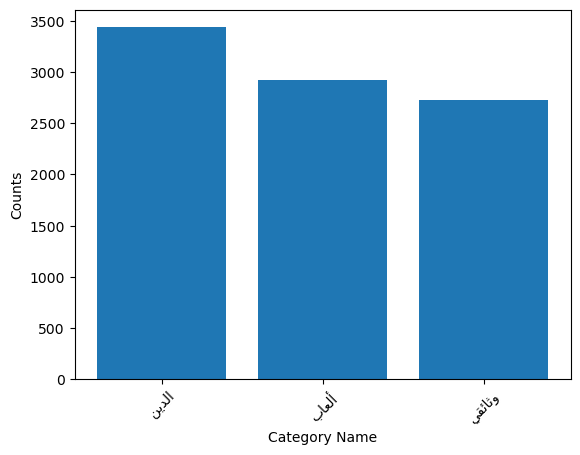

In [4]:
# Reshape and reorder the Arabic labels for proper display
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in category_names]
# Plot with bars
plt.bar(reshaped_labels, category_values)
plt.xlabel('Category Name')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Our database is well balanced when divided into three categories

# 2- Data Preparation

## 2.1 Data Cleaning

In [5]:
titles = data['title'] 
labels = data['category_name']
tiddy_features=[]
for i in titles: 
    # Remove special characters, retain Arabic letters and numbers
    tmp = re.sub(r'[^\u0620-\u063F\u0641-\u064A\u0660-\u0669]', ' ', str(i))
    # Remove numerical numbers
    tmp = re.sub(r'\d+', ' ', tmp)
    # Remove multiple spaces
    tmp = re.sub(r'\s+', ' ', tmp).strip()
    tiddy_features.append(tmp)

# Use zip to pair up tiddy_features and labels_list entries
paired_features_labels = list(zip(tiddy_features, labels))

# Filter out the pairs where the feature is an empty string
paired_features_labels = [(feature, label) for feature, label in paired_features_labels if feature]

# Unzip the pairs back into separate lists
tiddy_features, labels_list = zip(*paired_features_labels)

# Convert tuples back to lists (if you need lists)
tiddy_features = list(tiddy_features)
labels_list = list(labels_list)
       

### WordCloud Visualisation

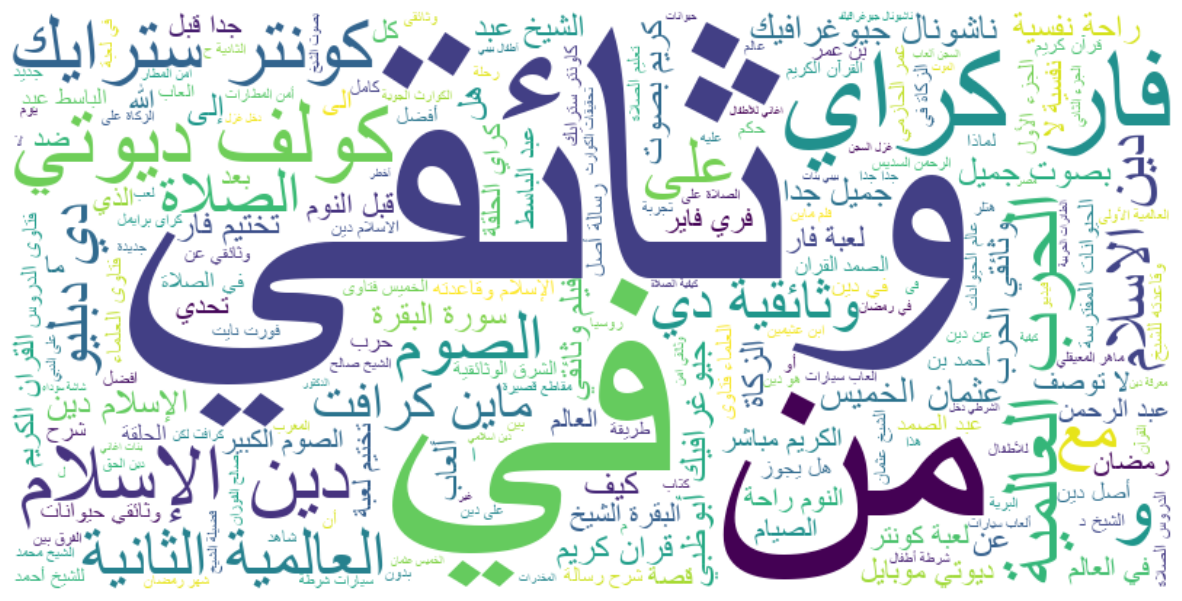

In [6]:
# Combine all text items into a single string and reshape
combined_text = ' '.join(tiddy_features)
reshaped_text = arabic_reshaper.reshape(combined_text)
bidi_text = get_display(reshaped_text)  # For right-to-left (RTL) languages

# Define a font that supports Arabic characters
font_path = "C:\\Windows\\Fonts\\arial.ttf"  # Escape backslashes for Windows paths

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(bidi_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

After cleaning the data we were able to see the wordcloud graph which represents the most used words in our database

## 2.2 Word Embedding using TF-IDF Vectorizer

In [7]:
arabic_stop_words = get_stop_words('arabic')

vectorizer = TfidfVectorizer(max_features=2000, min_df=7, max_df=0.8, stop_words=arabic_stop_words)
X=vectorizer.fit_transform(tiddy_features).toarray()


Splitting Data into 80% for train and 20% for test

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,labels_list,test_size=0.2)

# 3-Machine Learning

In [9]:
#Inialisation of ML Algorithms
model=MLPClassifier(hidden_layer_sizes=(100,150),activation='logistic',solver='adam')
gnb = GaussianNB()
linear_sm=SVC(kernel='linear',probability=True)
rbf_svm=SVC(kernel='rbf',probability=True)
sgd_svm=SVC(kernel='sigmoid',probability=True)
poly_svm =SVC(kernel='poly',degree=2,probability=True)


In [10]:
#Training of Ml Algorithms
model.fit(X_train,y_train)
gnb.fit(X_train,y_train)
linear_sm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sgd_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)

SVC(degree=2, kernel='poly', probability=True)

In [11]:
#Predection
y_pred_model=model.predict(X_test)
y_pred_gnb=gnb.predict(X_test)
y_pred_linear_sm=linear_sm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sgd_svm=sgd_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

# 4-Performance Evaluation

In [12]:
print("**************** Performance Evaluation of MLPClassifier  ****************")
print(classification_report(y_test,y_pred_model))
print()
print("****************    Performance Evaluation of NaiveBayes  ****************")
print(classification_report(y_test,y_pred_gnb))
print()
print("****************    Performance Evaluation of Linear SVM  ****************")
print(classification_report(y_test,y_pred_linear_sm))
print()
print("****************    Performance Evaluation of RBF SVM     ****************")
print(classification_report(y_test,y_pred_rbf_svm))
print()
print("****************    Performance Evaluation of SGD SVM     ****************")
print(classification_report(y_test,y_pred_sgd_svm))
print()
print("**************** Performance Evaluation of Polynomial SVM ****************")
print(classification_report(y_test,y_pred_poly_svm))
print()

**************** Performance Evaluation of MLPClassifier  ****************
              precision    recall  f1-score   support

       ألعاب       0.95      0.95      0.95       479
       الدين       0.99      0.98      0.99       657
      وثائقي       0.96      0.96      0.96       494

    accuracy                           0.97      1630
   macro avg       0.97      0.97      0.97      1630
weighted avg       0.97      0.97      0.97      1630


****************    Performance Evaluation of NaiveBayes  ****************
              precision    recall  f1-score   support

       ألعاب       0.88      0.93      0.90       479
       الدين       0.95      0.96      0.96       657
      وثائقي       0.95      0.89      0.92       494

    accuracy                           0.93      1630
   macro avg       0.93      0.93      0.93      1630
weighted avg       0.93      0.93      0.93      1630


****************    Performance Evaluation of Linear SVM  ****************
           

# 5-Deploiment of the best ml algorithm

In [13]:
pickle.dump(vectorizer,open('vectorizer.pickle',"wb"))
pickle.dump(rbf_svm,open('bestModel.pickle',"wb"))

## After using the tfidf for word embedding we noticed that it's not very effective and doesn't understand the video titles well and the prediction is not the best so we opted for a diffrent technique which is Continous Bag Of Words

# 6-Word Embedding using CBOW Vectorizer

In [14]:
# Use Continuous Bag of Words for feature extraction
vectorizer = CountVectorizer(max_features=2000, min_df=3, max_df=0.8, stop_words=arabic_stop_words)
X = vectorizer.fit_transform(tiddy_features).toarray()

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels_list, test_size=0.2)

# 7-Machine Learning

In [16]:
# Training of ML Algorithms
model.fit(X_train, y_train)
gnb.fit(X_train, y_train)
linear_sm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
sgd_svm.fit(X_train, y_train)
poly_svm.fit(X_train, y_train)

SVC(degree=2, kernel='poly', probability=True)

In [17]:
# Prediction
y_pred_model = model.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_linear_sm = linear_sm.predict(X_test)
y_pred_rbf_svm = rbf_svm.predict(X_test)
y_pred_sgd_svm = sgd_svm.predict(X_test)
y_pred_poly_svm = poly_svm.predict(X_test)

# 8-Performance Evaluation

In [18]:
# Performance Evaluation
print("**************** Performance Evaluation of MLPClassifier ****************")
print(classification_report(y_test, y_pred_model))
print()
print("**************** Performance Evaluation of NaiveBayes ****************")
print(classification_report(y_test, y_pred_gnb))
print()
print("**************** Performance Evaluation of Linear SVM ****************")
print(classification_report(y_test, y_pred_linear_sm))
print()
print("**************** Performance Evaluation of RBF SVM ****************")
print(classification_report(y_test, y_pred_rbf_svm))
print()
print("**************** Performance Evaluation of SGD SVM ****************")
print(classification_report(y_test, y_pred_sgd_svm))
print()
print("**************** Performance Evaluation of Polynomial SVM ****************")
print(classification_report(y_test, y_pred_poly_svm))

**************** Performance Evaluation of MLPClassifier ****************
              precision    recall  f1-score   support

       ألعاب       0.96      0.98      0.97       482
       الدين       0.98      0.99      0.99       653
      وثائقي       0.98      0.95      0.97       495

    accuracy                           0.98      1630
   macro avg       0.97      0.97      0.97      1630
weighted avg       0.98      0.98      0.98      1630


**************** Performance Evaluation of NaiveBayes ****************
              precision    recall  f1-score   support

       ألعاب       0.89      0.98      0.93       482
       الدين       0.99      0.96      0.97       653
      وثائقي       0.98      0.92      0.95       495

    accuracy                           0.95      1630
   macro avg       0.95      0.95      0.95      1630
weighted avg       0.96      0.95      0.95      1630


**************** Performance Evaluation of Linear SVM ****************
              precis

# 9-Deploiment

In [19]:
pickle.dump(vectorizer,open('vectorizerBAG.pickle',"wb"))
pickle.dump(model,open('bestModelBAG.pickle',"wb"))